<a href="https://colab.research.google.com/github/sonavmorris/MAIN-PROJECT-AUTHENTICATION-OF-AN-INDIVIDUAL-USING-IRIS-RECOGNITION/blob/main/IRIS%20MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops
import matplotlib.pyplot as plt
img = cv2.imread('/content/0003_007.bmp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, hog
from skimage.filters import gabor_kernel
from skimage import exposure
from cv2.xfeatures2d import SIFT_create


In [2]:
from skimage.feature import local_binary_pattern
radius = 3
n_points = 8 * radius
method = 'uniform'
# Compute LBP features
lbp = local_binary_pattern(gray, n_points, radius, method)


In [3]:
distances = [1, 2, 3]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
glcm = greycomatrix(gray, distances, angles, symmetric=True, normed=True)
contrast = greycoprops(glcm, 'contrast')
energy = greycoprops(glcm, 'energy')
homogeneity = greycoprops(glcm, 'homogeneity')


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


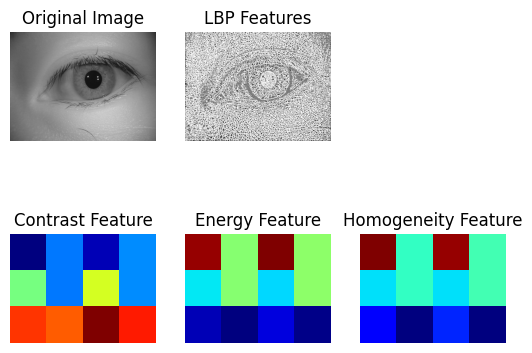

In [4]:
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(lbp, cmap='gray')
plt.title('LBP Features')
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(contrast, cmap='jet')
plt.title('Contrast Feature')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(energy, cmap='jet')
plt.title('Energy Feature')
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(homogeneity, cmap='jet')
plt.title('Homogeneity Feature')
plt.axis('off')

plt.show()


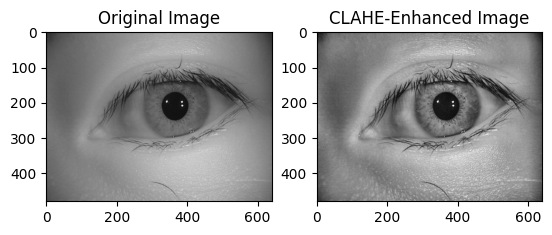

In [5]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(clahe_img, cmap='gray')
ax[1].set_title('CLAHE-Enhanced Image')
plt.show()


<ipython-input-6-cd35d2bdc58f>:17: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feats, hog_image = hog(gray, orientations=8, pixels_per_cell=(16, 16),


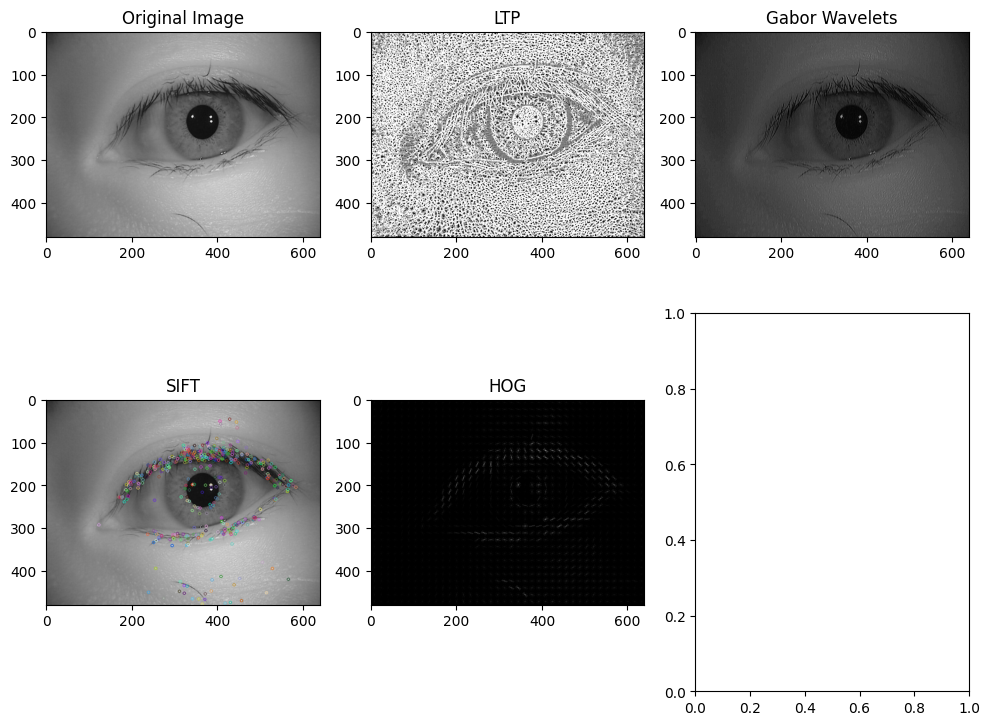

In [6]:
radius = 3
n_points = 8 * radius
ltp = local_binary_pattern(gray, n_points, radius, method='uniform')
frequencies = [0.6, 1.2, 1.8]
thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]
kernels = []
for frequency in frequencies:
    for theta in thetas:
        kernel = np.real(gabor_kernel(frequency, theta=theta))
        kernels.append(kernel)
gabor_feats = np.zeros((gray.shape[0], gray.shape[1], len(kernels)))
for idx, kernel in enumerate(kernels):
    filtered = cv2.filter2D(gray, -1, kernel)
    gabor_feats[:, :, idx] = filtered
sift = SIFT_create()
kp_sift, sift_feats = sift.detectAndCompute(gray, None)
hog_feats, hog_image = hog(gray, orientations=8, pixels_per_cell=(16, 16),
                            cells_per_block=(1, 1), visualize=True, multichannel=False)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,8))
axs[0, 0].imshow(img)
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(ltp, cmap='gray')
axs[0, 1].set_title('LTP')
axs[0, 2].imshow(gabor_feats[:, :, 0], cmap='gray')
axs[0, 2].set_title('Gabor Wavelets')
axs[1, 0].imshow(cv2.drawKeypoints(gray, kp_sift, None))
axs[1, 0].set_title('SIFT')
axs[1, 1].imshow(hog_image, cmap='gray')
axs[1, 1].set_title('HOG')
plt.tight_layout()
plt.show()


In [7]:
from skimage.feature import greycomatrix, greycoprops
import skimage

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/data_iris.zip') as f:
  f.extractall()

In [10]:
import cv2
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from skimage.feature import local_binary_pattern
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import cv2
import os
import cv2
import pandas as pd
import numpy as np
from skimage.feature import local_binary_pattern
import pandas as pd
import os
def glcm_features_1(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = skimage.feature.graycomatrix(gray, [1, 2, 3, 4, 5], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)
    contrast = skimage.feature.graycoprops(glcm, 'contrast').ravel()
    dissimilarity = skimage.feature.graycoprops(glcm, 'dissimilarity').ravel()
    homogeneity = skimage.feature.graycoprops(glcm, 'homogeneity').ravel()
    energy = skimage.feature.graycoprops(glcm, 'energy').ravel()
    correlation = skimage.feature.graycoprops(glcm, 'correlation').ravel()
    ASM = skimage.feature.graycoprops(glcm, 'ASM').ravel()
    features = np.concatenate([contrast, dissimilarity, homogeneity, energy, correlation, ASM])
    return features[:100].tolist()
def lbp_features_1(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, 8, 1)
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(101), density=True)
    return hist.tolist()
def sift_features_1(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    sift_features = descriptors.mean(axis=0)
    return list(sift_features.flatten())
def orb_features_1(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create(nfeatures=100)
    kp, des = orb.detectAndCompute(gray, None)
    return np.hstack((des,des)).flatten()[:100].tolist()
def extract_features(image):
    glcm_features = glcm_features_1(image)
    lbp_features = lbp_features_1(image)
    sift_features = sift_features_1(image)
    hog_features = orb_features_1(image)
    return glcm_features + lbp_features  + sift_features + hog_features


columns = ["image_id","person_id", "features"]
features_df = pd.DataFrame(columns=columns)


In [11]:
for foldername in os.listdir("/content/device1"):
    folderpath = os.path.join("/content/device1", foldername)
    if os.path.isdir(folderpath):
        i = 0
        for filename in os.listdir(folderpath):
            
            filepath = os.path.join(folderpath, filename)
            if os.path.isfile(filepath):
              if filepath.split('/')[-1][-3:]=="bmp":
                image = cv2.imread(filepath)
                image_features = np.array(extract_features(image)).ravel()
                # row = [filename[:-4]] + [foldername]+ [str(image_features)]
                # print(row)
                row = {"image_id":filename[:-4],"person_id":foldername, "features":image_features}
                features_df = features_df.append(row, ignore_index=True)
                i += 1
                if i==15:
                  break

In [12]:
for foldername in os.listdir("/content/device2"):
    folderpath = os.path.join("/content/device2", foldername)
    if os.path.isdir(folderpath):
        i = 0
        for filename in os.listdir(folderpath):
            
            filepath = os.path.join(folderpath, filename)
            if os.path.isfile(filepath):
              if filepath.split('/')[-1][-3:]=="bmp":
                image = cv2.imread(filepath)
                image_features = np.array(extract_features(image)).ravel()
                # row = [filename[:-4]] + [foldername]+ [str(image_features)]
                # print(row)
                row = {"image_id":filename[:-4],"person_id":foldername, "features":image_features}
                features_df = features_df.append(row, ignore_index=True)
                i += 1
                if i==15:
                  break

In [13]:
features_df

,image_id,person_id,features
0,0006_006,0006,"[36.32728873239176, 69.6564928891307, 45.74441..."
1,0006_002,0006,"[33.383776734479106, 76.11261724836857, 55.774..."
2,0006_016,0006,"[29.329248174228976, 61.69382941116469, 43.747..."
3,0006_014,0006,"[33.113282472611715, 55.99101545015543, 29.713..."
4,0006_000,0006,"[30.431223917578215, 61.97722825003348, 42.040..."
...,...,...,...
1795,0011_012,0011,"[13.18425273865355, 21.308718933875927, 9.4596..."
1796,0011_016,0011,"[13.290140845069866, 21.945710449193733, 9.937..."
1797,0011_014,0011,"[11.895445357328661, 20.074686112498735, 9.369..."
1798,0011_006,0011,"[19.056119587897143, 31.5737533528689, 14.8547..."


In [14]:
features_df[list(range(len(features_df['features'][0])))] = features_df['features'].apply(pd.Series)

In [15]:
features_df.columns = features_df.columns.astype(str)
features_df

,image_id,person_id,features,0,1,2,3,4,5,6,...,418,419,420,421,422,423,424,425,426,427
0,0006_006,0006,"[36.32728873239176, 69.6564928891307, 45.74441...",36.327289,69.656493,45.744412,69.352815,89.579787,69.656493,112.556757,...,71.0,63.0,81.0,123.0,215.0,162.0,164.0,237.0,53.0,255.0
1,0006_002,0006,"[33.383776734479106, 76.11261724836857, 55.774...",33.383777,76.112617,55.774494,78.697371,83.450023,76.112617,142.609071,...,197.0,87.0,198.0,255.0,208.0,246.0,173.0,221.0,238.0,119.0
2,0006_016,0006,"[29.329248174228976, 61.69382941116469, 43.747...",29.329248,61.693829,43.747769,64.556088,70.700767,61.693829,110.024987,...,85.0,51.0,192.0,120.0,70.0,10.0,112.0,36.0,188.0,52.0
3,0006_014,0006,"[33.113282472611715, 55.99101545015543, 29.713...",33.113282,55.991015,29.713368,49.030368,78.826192,55.991015,73.568580,...,35.0,100.0,88.0,3.0,1.0,116.0,133.0,141.0,27.0,32.0
4,0006_000,0006,"[30.431223917578215, 61.97722825003348, 42.040...",30.431224,61.977228,42.040694,62.741454,77.010057,61.977228,108.574644,...,5.0,54.0,64.0,50.0,74.0,0.0,100.0,101.0,156.0,71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0011_012,0011,"[13.18425273865355, 21.308718933875927, 9.4596...",13.184253,21.308719,9.459610,18.212921,33.804333,21.308719,27.060202,...,37.0,48.0,106.0,179.0,70.0,187.0,125.0,249.0,25.0,99.0
1796,0011_016,0011,"[13.290140845069866, 21.945710449193733, 9.937...",13.290141,21.945710,9.937758,19.042345,34.480372,21.945710,28.381325,...,16.0,107.0,192.0,64.0,199.0,43.0,192.0,184.0,154.0,115.0
1797,0011_014,0011,"[11.895445357328661, 20.074686112498735, 9.369...",11.895445,20.074686,9.369233,17.306955,31.186556,20.074686,26.763386,...,117.0,121.0,224.0,64.0,134.0,106.0,248.0,188.0,191.0,118.0
1798,0011_006,0011,"[19.056119587897143, 31.5737533528689, 14.8547...",19.056120,31.573753,14.854701,27.473835,47.919880,31.573753,40.948441,...,85.0,16.0,192.0,121.0,198.0,34.0,100.0,44.0,159.0,119.0


In [16]:
features_df.to_csv("/content/drive/MyDrive/algo_features.csv")

In [17]:
import pandas as pd
import numpy as np
from skimage.feature import local_binary_pattern

df = features_df
image = cv2.imread('/content/device1/0011/0011_018.bmp')
image_features = np.array(extract_features(image)).ravel()
face_features = image_features
distances = np.linalg.norm(df.iloc[:, 3:].values - face_features, axis=1)
min_distance_row = df.iloc[np.argmin(distances)]
person_id = min_distance_row['person_id']
print(f"Recognized person ID: {person_id}")

Recognized person ID: 0011


In [18]:
new_df = features_df.groupby(['person_id']).mean()
new_df.reset_index()

,person_id,0,1,2,3,4,5,6,7,8,...,418,419,420,421,422,423,424,425,426,427
0,0000,17.764208,30.568870,14.914756,25.012600,41.879324,30.568870,39.749539,25.012600,58.554246,...,109.700000,126.466667,174.866667,132.233333,147.733333,101.466667,148.100000,142.333333,153.433333,111.933333
1,0001,15.202670,24.590155,14.965753,27.271308,36.094127,24.590155,39.750031,27.271308,51.248046,...,98.100000,114.000000,176.766667,156.566667,144.533333,91.433333,167.900000,164.000000,170.133333,95.533333
2,0002,21.562735,37.572407,20.342054,32.600195,52.222038,37.572407,51.747774,32.600195,74.084991,...,103.633333,110.300000,149.166667,159.166667,140.200000,112.533333,146.100000,134.533333,145.900000,120.133333
3,0003,22.339925,32.941907,20.146214,37.490585,54.005616,32.941907,51.568350,37.490585,75.389595,...,111.066667,139.333333,149.866667,146.533333,147.900000,115.533333,146.400000,137.200000,152.033333,149.466667
4,0004,28.392264,40.579561,28.034047,53.487097,68.852922,40.579561,74.203833,53.487097,100.923464,...,94.800000,80.333333,169.766667,113.833333,144.033333,88.566667,152.033333,147.333333,174.233333,126.266667
5,0005,22.402586,41.121192,24.682021,38.251863,54.249021,41.121192,64.347672,38.251863,80.076550,...,94.100000,78.100000,144.766667,113.000000,112.866667,88.100000,170.066667,137.433333,132.900000,123.000000
6,0006,21.208980,46.592160,30.067424,42.496525,53.549885,46.592160,78.801465,42.496525,81.103051,...,79.500000,68.800000,148.466667,122.366667,127.066667,61.700000,159.700000,142.266667,160.500000,127.666667
7,0007,23.207552,36.926221,25.900430,46.889095,59.208094,36.926221,68.908020,46.889095,89.559642,...,95.300000,101.766667,145.066667,126.166667,123.966667,97.600000,145.300000,121.133333,157.500000,130.566667
8,0008,15.605992,33.236873,20.966087,30.443574,39.046545,33.236873,54.937349,30.443574,58.705098,...,96.800000,109.533333,130.633333,144.100000,115.833333,105.800000,125.633333,123.966667,145.200000,95.033333
9,0009,15.063838,28.523832,19.679555,31.708956,38.230644,28.523832,51.130519,31.708956,58.126080,...,80.733333,115.266667,145.366667,132.133333,116.866667,97.300000,144.500000,137.200000,140.900000,121.333333


In [19]:
new_df.T

person_id,0000,0001,0002,0003,0004,0005,0006,0007,0008,0009,...,0050,0051,0052,0053,0054,0055,0056,0057,0058,0059
0,17.764208,15.202670,21.562735,22.339925,28.392264,22.402586,21.208980,23.207552,15.605992,15.063838,...,12.124838,11.065448,19.889660,18.218921,15.987302,14.856673,15.643494,19.235368,13.126861,13.459701
1,30.568870,24.590155,37.572407,32.941907,40.579561,41.121192,46.592160,36.926221,33.236873,28.523832,...,22.696621,19.608864,38.905369,40.255239,27.909410,26.931516,27.288555,35.914063,26.148307,28.415392
2,14.914756,14.965753,20.342054,20.146214,28.034047,24.682021,30.067424,25.900430,20.966087,19.679555,...,12.866383,12.210747,25.043387,25.783843,17.838751,16.691993,16.610228,20.571276,16.542549,18.365781
3,25.012600,27.271308,32.600195,37.490585,53.487097,38.251863,42.496525,46.889095,30.443574,31.708956,...,20.686058,21.310233,37.628194,35.346556,29.995011,26.653454,28.044973,32.097162,25.159582,26.740708
4,41.879324,36.094127,52.222038,54.005616,68.852922,54.249021,53.549885,59.208094,39.046545,38.230644,...,31.742639,29.568192,48.464633,45.485405,39.492311,36.838365,41.051708,48.550460,32.671192,32.962432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,101.466667,91.433333,112.533333,115.533333,88.566667,88.100000,61.700000,97.600000,105.800000,97.300000,...,86.366667,82.333333,131.033333,132.200000,73.733333,61.500000,86.800000,80.200000,100.833333,76.233333
424,148.100000,167.900000,146.100000,146.400000,152.033333,170.066667,159.700000,145.300000,125.633333,144.500000,...,139.866667,141.400000,145.666667,149.866667,163.333333,169.700000,181.100000,152.266667,159.600000,151.366667
425,142.333333,164.000000,134.533333,137.200000,147.333333,137.433333,142.266667,121.133333,123.966667,137.200000,...,147.966667,118.100000,147.800000,122.000000,125.666667,129.166667,146.766667,132.100000,134.900000,151.600000
426,153.433333,170.133333,145.900000,152.033333,174.233333,132.900000,160.500000,157.500000,145.200000,140.900000,...,160.766667,140.133333,159.133333,145.166667,156.466667,143.200000,137.233333,166.966667,160.966667,136.966667


In [20]:
#!pip install pandas_profiling

In [21]:
#from pandas_profiling import ProfileReport

In [22]:
#html = ProfileReport(new_df.T,explorative=True)

In [23]:
#html

In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image as pre
from tensorflow.keras.applications.resnet50 import preprocess_input
model = ResNet50(weights='imagenet', include_top=True)
model.summary()
def extract_features(img_path):
    img = pre.load_img(img_path, target_size=(224, 224))
    x = pre.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x,verbose=False)
    return features.flatten()


102967424/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

In [25]:
features_list = []
person_ids_list = []
for foldername in os.listdir("/content/device2"):
    folderpath = os.path.join("/content/device2", foldername)
    if os.path.isdir(folderpath):

        i = 0
        for filename in os.listdir(folderpath):
            
            filepath = os.path.join(folderpath, filename)
            if os.path.isfile(filepath):
              if filepath.split('/')[-1][-3:]=="bmp":
                image = cv2.imread(filepath)
                image_features = np.array(extract_features(filepath)).ravel()
                # row = [filename[:-4]] + [foldername]+ [str(image_features)]
                # print(row)
                #row = {"image_id":filename[:-4],"person_id":foldername, "features":image_features}
                #print(image_features.shape)
                #features_df = features_df.append(row, ignore_index=True)
                i += 1
                features_list.append(image_features)
                person_ids_list.append(filename[:4])
                if i==15:
                  break
                #features = extract_features(image_paths[i])


In [26]:
len(features_list)

900

In [27]:
df = pd.DataFrame(features_list)
df.insert(0, 'person_id', person_ids_list)

In [28]:
features_list = []
person_ids_list = []
for foldername in os.listdir("/content/device1"):
    folderpath = os.path.join("/content/device1", foldername)
    if os.path.isdir(folderpath):
        i = 0
        for filename in os.listdir(folderpath):   
            filepath = os.path.join(folderpath, filename)
            if os.path.isfile(filepath):
              if filepath.split('/')[-1][-3:]=="bmp":
                image = cv2.imread(filepath)
                image_features = np.array(extract_features(filepath)).ravel()
                # row = [filename[:-4]] + [foldername]+ [str(image_features)]
                # print(row)
                #row = {"image_id":filename[:-4],"person_id":foldername, "features":image_features}
                #print(image_features.shape)
                #features_df = features_df.append(row, ignore_index=True)
                i += 1
                features_list.append(image_features)
                person_ids_list.append(filename[:4])
                if i==15:
                  break
                #features = extract_features(image_paths[i])


In [29]:
for i in range(len(person_ids_list)):
    df.loc[len(df)] = [person_ids_list[i]]+features_list[i].tolist()

In [30]:
df

,person_id,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0006,2.614397e-06,0.000066,7.449081e-04,0.001084,0.000081,8.688160e-06,2.840001e-05,1.096254e-06,1.727494e-06,...,2.702369e-06,3.129128e-08,1.129819e-07,1.286984e-09,1.367382e-08,1.649650e-06,2.573636e-08,7.195875e-09,7.360668e-06,0.000799
1,0006,1.382969e-05,0.000150,1.790456e-03,0.005630,0.000380,3.643267e-05,1.203154e-04,8.885169e-06,9.325086e-06,...,1.214019e-05,6.971370e-08,6.853325e-07,2.932826e-09,6.090641e-08,1.889724e-05,9.163343e-08,9.999405e-08,1.474122e-05,0.002874
2,0006,3.699169e-06,0.000056,3.511857e-04,0.000744,0.000020,1.644542e-06,6.753977e-06,1.389380e-05,5.863895e-06,...,1.236302e-04,3.507862e-08,1.309568e-07,3.634049e-09,5.613508e-08,7.886456e-05,7.532234e-08,1.234746e-07,1.318503e-04,0.002063
3,0006,4.700937e-06,0.000060,1.426621e-04,0.001862,0.000033,3.406687e-06,2.040232e-05,1.021689e-05,1.028966e-05,...,1.214476e-04,2.554456e-08,4.279084e-08,3.163881e-09,1.568594e-08,1.389626e-05,2.736202e-08,8.322218e-08,5.036427e-05,0.000887
4,0006,1.494227e-05,0.000148,2.779325e-03,0.005958,0.000265,1.706172e-05,1.530271e-04,1.591249e-06,1.476866e-06,...,1.880045e-06,3.205147e-08,1.550337e-07,1.202354e-09,2.853045e-08,8.526462e-06,3.535595e-08,1.219994e-08,1.771832e-05,0.003172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0011,4.602109e-06,0.000041,2.098383e-06,0.000244,0.000010,2.431150e-08,1.927204e-06,3.319230e-07,1.128736e-07,...,2.018648e-07,1.211510e-08,2.071274e-09,8.003186e-11,2.213932e-09,2.374950e-08,2.036717e-09,4.035648e-10,7.420033e-06,0.016051
1796,0011,2.105706e-06,0.000031,9.598808e-07,0.000424,0.000009,4.320195e-08,1.289674e-06,1.706840e-07,5.197397e-08,...,1.979108e-07,1.588602e-08,2.045094e-09,5.330825e-11,6.046544e-10,3.632935e-08,1.469908e-09,2.507184e-09,4.214286e-06,0.013361
1797,0011,2.175840e-06,0.000020,3.464241e-06,0.001562,0.000013,1.002218e-07,1.261853e-05,2.551338e-07,1.293042e-07,...,1.984733e-06,3.588401e-08,1.437698e-08,3.411238e-10,5.074769e-09,1.277119e-07,4.698786e-09,1.331720e-08,3.351850e-06,0.045439
1798,0011,4.493732e-07,0.000021,8.490415e-07,0.000047,0.000011,3.656332e-08,4.301845e-06,2.172062e-06,6.391938e-07,...,1.255023e-07,8.426333e-09,6.036240e-10,4.081838e-11,2.063238e-09,1.721055e-08,1.489522e-09,2.210378e-10,2.549286e-06,0.050821


In [31]:
import pandas as pd
import numpy as np
from skimage.feature import local_binary_pattern


correct = 0
total = 0
df = df
features_list = []
person_ids_list = []
for foldername in os.listdir("/content/device2"):
    folderpath = os.path.join("/content/device2", foldername)
    if os.path.isdir(folderpath):
        for filename in os.listdir(folderpath):
            i = 0
            filepath = os.path.join(folderpath, filename)
            if os.path.isfile(filepath):
              if filepath.split('/')[-1][-3:]=="bmp":
                image = cv2.imread(filepath)              
                image_features = np.array(extract_features(filepath)).ravel()
                face_features = image_features
                distances = np.linalg.norm(df.iloc[:, 1:].values - face_features, axis=1)
                min_distance_row = df.iloc[np.argmin(distances)]
                person_id = min_distance_row['person_id']
                if person_id == filename[:4]:
                  correct += 1
                total += 1
        print(f"Accuracy current {correct/total}")

Accuracy current 0.9
Accuracy current 0.825
Accuracy current 0.85
Accuracy current 0.85
Accuracy current 0.86
Accuracy current 0.85
Accuracy current 0.8357142857142857
Accuracy current 0.84375
Accuracy current 0.85
Accuracy current 0.86
Accuracy current 0.8590909090909091
Accuracy current 0.8541666666666666
Accuracy current 0.8538461538461538
Accuracy current 0.8571428571428571
Accuracy current 0.8533333333333334
Accuracy current 0.85
Accuracy current 0.8558823529411764
Accuracy current 0.8555555555555555
Accuracy current 0.8552631578947368
Accuracy current 0.86
Accuracy current 0.8642857142857143
Accuracy current 0.865909090909091
Accuracy current 0.8608695652173913
Accuracy current 0.8645833333333334
Accuracy current 0.866
Accuracy current 0.8692307692307693
Accuracy current 0.8666666666666667
Accuracy current 0.8660714285714286
Accuracy current 0.8689655172413793
Accuracy current 0.865
Accuracy current 0.8629032258064516
Accuracy current 0.8625
Accuracy current 0.8636363636363636
Ac

In [32]:
df.to_csv('dl_features.csv', index=False)

In [33]:
df

,person_id,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,0006,2.614397e-06,0.000066,7.449081e-04,0.001084,0.000081,8.688160e-06,2.840001e-05,1.096254e-06,1.727494e-06,...,2.702369e-06,3.129128e-08,1.129819e-07,1.286984e-09,1.367382e-08,1.649650e-06,2.573636e-08,7.195875e-09,7.360668e-06,0.000799
1,0006,1.382969e-05,0.000150,1.790456e-03,0.005630,0.000380,3.643267e-05,1.203154e-04,8.885169e-06,9.325086e-06,...,1.214019e-05,6.971370e-08,6.853325e-07,2.932826e-09,6.090641e-08,1.889724e-05,9.163343e-08,9.999405e-08,1.474122e-05,0.002874
2,0006,3.699169e-06,0.000056,3.511857e-04,0.000744,0.000020,1.644542e-06,6.753977e-06,1.389380e-05,5.863895e-06,...,1.236302e-04,3.507862e-08,1.309568e-07,3.634049e-09,5.613508e-08,7.886456e-05,7.532234e-08,1.234746e-07,1.318503e-04,0.002063
3,0006,4.700937e-06,0.000060,1.426621e-04,0.001862,0.000033,3.406687e-06,2.040232e-05,1.021689e-05,1.028966e-05,...,1.214476e-04,2.554456e-08,4.279084e-08,3.163881e-09,1.568594e-08,1.389626e-05,2.736202e-08,8.322218e-08,5.036427e-05,0.000887
4,0006,1.494227e-05,0.000148,2.779325e-03,0.005958,0.000265,1.706172e-05,1.530271e-04,1.591249e-06,1.476866e-06,...,1.880045e-06,3.205147e-08,1.550337e-07,1.202354e-09,2.853045e-08,8.526462e-06,3.535595e-08,1.219994e-08,1.771832e-05,0.003172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0011,4.602109e-06,0.000041,2.098383e-06,0.000244,0.000010,2.431150e-08,1.927204e-06,3.319230e-07,1.128736e-07,...,2.018648e-07,1.211510e-08,2.071274e-09,8.003186e-11,2.213932e-09,2.374950e-08,2.036717e-09,4.035648e-10,7.420033e-06,0.016051
1796,0011,2.105706e-06,0.000031,9.598808e-07,0.000424,0.000009,4.320195e-08,1.289674e-06,1.706840e-07,5.197397e-08,...,1.979108e-07,1.588602e-08,2.045094e-09,5.330825e-11,6.046544e-10,3.632935e-08,1.469908e-09,2.507184e-09,4.214286e-06,0.013361
1797,0011,2.175840e-06,0.000020,3.464241e-06,0.001562,0.000013,1.002218e-07,1.261853e-05,2.551338e-07,1.293042e-07,...,1.984733e-06,3.588401e-08,1.437698e-08,3.411238e-10,5.074769e-09,1.277119e-07,4.698786e-09,1.331720e-08,3.351850e-06,0.045439
1798,0011,4.493732e-07,0.000021,8.490415e-07,0.000047,0.000011,3.656332e-08,4.301845e-06,2.172062e-06,6.391938e-07,...,1.255023e-07,8.426333e-09,6.036240e-10,4.081838e-11,2.063238e-09,1.721055e-08,1.489522e-09,2.210378e-10,2.549286e-06,0.050821


In [34]:
from keras.preprocessing.image import ImageDataGenerator
import os
data_dir = "/content/device1/"
val_percent = 0.1
img_size = (224, 224)
batch_size = 32
num_val_samples = int(len(os.listdir(data_dir)) * val_percent)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=val_percent)

train_generator_1 = train_datagen.flow_from_directory(data_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')

val_generator_1 = train_datagen.flow_from_directory(data_dir,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='validation')


Found 1080 images belonging to 60 classes.
Found 120 images belonging to 60 classes.


In [35]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications import VGG19
img_shape = (224, 224, 3)
num_classes = 60
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=img_shape)
for layer in vgg19.layers:
    layer.trainable = False
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator_1, epochs=10, validation_data=val_generator_1)


80134624/80134624 [==============================] - 1s 0us/step
Epoch 1/10
34/34 [==============================] - 939s 28s/step - loss: 6.0040 - accuracy: 0.0574 - val_loss: 3.7273 - val_accuracy: 0.0917
Epoch 2/10
34/34 [==============================] - 869s 26s/step - loss: 3.4833 - accuracy: 0.1741 - val_loss: 3.1982 - val_accuracy: 0.3000
Epoch 3/10
34/34 [==============================] - 923s 27s/step - loss: 2.8686 - accuracy: 0.3509 - val_loss: 2.5099 - val_accuracy: 0.4667
Epoch 4/10
34/34 [==============================] - 931s 27s/step - loss: 2.2463 - accuracy: 0.4981 - val_loss: 2.0098 - val_accuracy: 0.5917
Epoch 5/10
34/34 [==============================] - 905s 27s/step - loss: 1.6217 - accuracy: 0.7009 - val_loss: 1.4997 - val_accuracy: 0.7667
Epoch 6/10
34/34 [==============================] - 900s 27s/step - loss: 1.1938 - accuracy: 0.7981 - val_loss: 1.2199 - val_accuracy: 0.7833
Epoch 7/10
34/34 [==============================] - 842s 25s/step - loss: 0.8731 - 

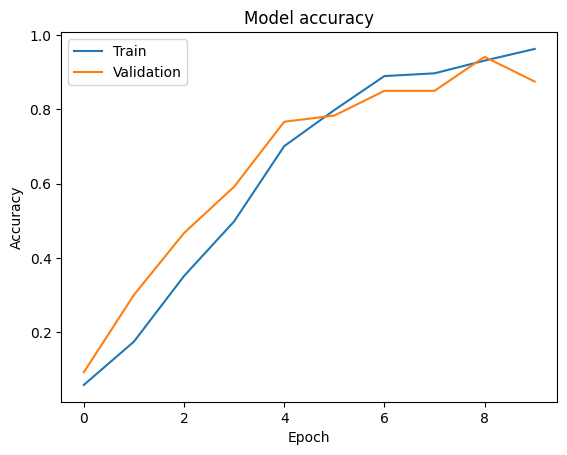

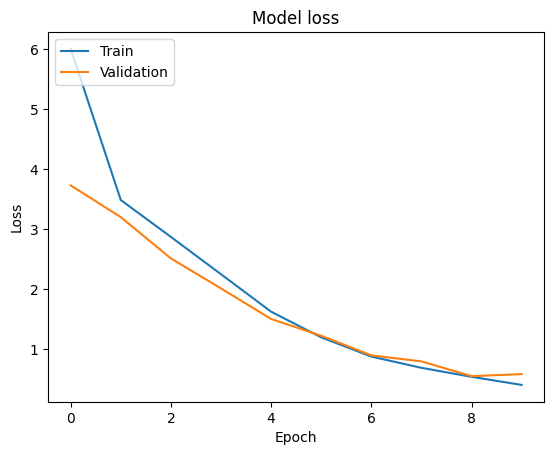

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [37]:
train_generator_2 = train_datagen.flow_from_directory("/content/device2/",
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')

val_generator_2 = train_datagen.flow_from_directory("/content/device2/",
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='validation')

Found 1080 images belonging to 60 classes.
Found 120 images belonging to 60 classes.


In [38]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications import VGG19
img_shape = (224, 224, 3)
num_classes = 60
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=img_shape)
for layer in vgg19.layers:
    layer.trainable = False
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator_2, epochs=10, validation_data=val_generator_2)


Epoch 1/10
34/34 [==============================] - 838s 25s/step - loss: 4.7938 - accuracy: 0.0704 - val_loss: 3.6023 - val_accuracy: 0.1583
Epoch 2/10
34/34 [==============================] - 897s 26s/step - loss: 3.1755 - accuracy: 0.2509 - val_loss: 2.7220 - val_accuracy: 0.3333
Epoch 3/10
34/34 [==============================] - 832s 25s/step - loss: 2.3398 - accuracy: 0.4296 - val_loss: 2.0673 - val_accuracy: 0.5167
Epoch 4/10
34/34 [==============================] - 835s 25s/step - loss: 1.7216 - accuracy: 0.5991 - val_loss: 1.6799 - val_accuracy: 0.5083
Epoch 5/10
34/34 [==============================] - 894s 26s/step - loss: 1.2863 - accuracy: 0.7111 - val_loss: 1.4276 - val_accuracy: 0.6250
Epoch 6/10
34/34 [==============================] - 896s 26s/step - loss: 1.0185 - accuracy: 0.7796 - val_loss: 1.0996 - val_accuracy: 0.6833
Epoch 7/10
34/34 [==============================] - 891s 26s/step - loss: 0.7824 - accuracy: 0.8231 - val_loss: 0.9184 - val_accuracy: 0.7500
Epoch 

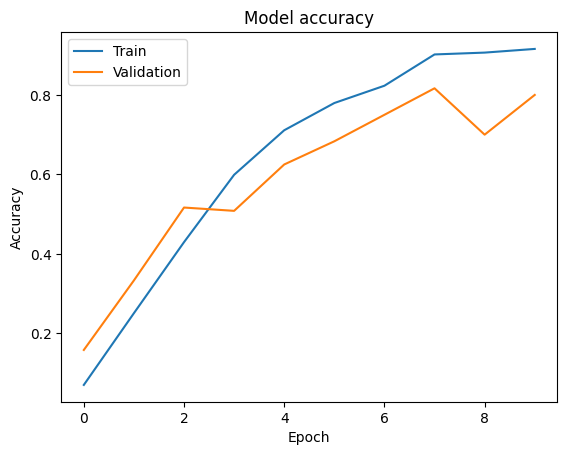

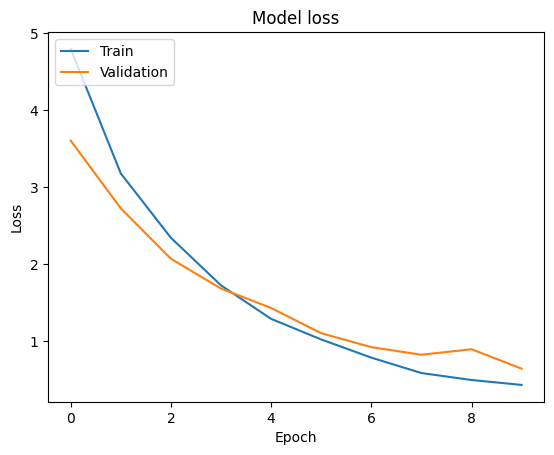

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
